# Определение перспективного тарифа для телеком-компании

## Введение
«Мегалайн» — федеральный оператор сотовой связи - предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Ниже приведен предварительный анализ тарифов на небольшой выборке клиентов. Цель работы - проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
1. **Тариф «Смарт»**
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
2. **Тариф «Ультра»**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

###  Требуется проанализировать
Описать поведение клиентов оператора исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

###  Гипотезы, требующие проверки
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Также требуется пояснить: 
1. как сформулированы нулевая и альтернативная гипотезы;
2. какой критерий использован для проверки гипотез и почему.

## Изучение данных

Заранее вызовем все библиотеки, которые потребуются в работе над проектом.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from datetime import datetime
from scipy import stats as st
from math import factorial

Изучим приложенные датасеты: 

In [63]:
df_calls = pd.read_csv('/datasets/calls.csv',sep=',')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [64]:
display(df_calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [65]:
df_internet = pd.read_csv('/datasets/internet.csv',sep=',')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [66]:
display(df_internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [67]:
df_messages = pd.read_csv('/datasets/messages.csv',sep=',')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [68]:
display(df_messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [69]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv',sep=',')
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [70]:
display(df_tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [71]:
df_users = pd.read_csv('/datasets/users.csv',sep=',')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [72]:
display(df_users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


**Выводы**: 
1. требуется объединить данные в один датасет для удобства работы, общий идентификатор - *user_id* и *месяц*
2. требуется изменить тип части данных (object - в datetime, float - в int) для успешной работы методов и для уменьшения объема занимаемой памяти,
3. пропусков немного, требуется более детально их изучить.

## Подготовка данных

### Длительность вызова

Добавим столбец *month* в датасет *calls* по дате вызова.
Округлим значение длительности вызова согласно условиям тарифа.
Изучим данные.

In [73]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls['duration']=np.ceil(df_calls['duration'])
df_calls['month'].value_counts()

12    33987
11    29501
10    27146
9     24061
8     21488
7     18298
6     14716
5     12647
4      9272
3      6687
2      3328
1      1476
Name: month, dtype: int64

Сгруппируем длительность вызовов по *user_id* и *month*, получим длительность разговоров помесячно по пользователям. 

In [74]:
df_calls_grouped = df_calls.groupby(['user_id','month'])['duration'].sum().reset_index()

### Трафик Мб

Добавим столбец *month* в датасет *internet* по дате сессии в сети интернет.
Изучим данные.

In [75]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet['month'].value_counts()

12    24799
11    21817
10    20009
9     17512
8     16092
7     13548
6     11057
5      9408
4      6511
3      4885
2      2641
1      1117
Name: month, dtype: int64

Сгруппируем количество Мб по *user_id* и *month*, получим расход трафика в МБ помесячно по пользователям. 

In [76]:
df_internet_grouped = df_internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()

### Число сообщений

Добавим столбец *month* в датасет *message* по дате сообщения.
Изучим данные.

In [77]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages['month'].value_counts()

12    20555
11    18244
10    17114
9     14759
8     13088
7     11320
6      8983
5      7298
4      5179
3      3648
2      1924
1       924
Name: month, dtype: int64

Посчитаем количество сообщений по *user_id* и *month*, получим количество сообщений помесячно по пользователям. 

In [78]:
df_messages_grouped = df_messages.groupby(['user_id','month'])['id'].count().reset_index()

### Объединение датасетов

Поэтапно смёрджим датасеты по паре *user_id* и *month*

In [79]:
df = df_calls_grouped.merge(df_internet_grouped, on = ['user_id','month'], how = 'outer')
df = df.merge(df_messages_grouped,on = ['user_id','month'], how='outer')
display(df.head())

,user_id,month,duration,mb_used,id
0,1000,5,159.0,2253.49,22.0
1,1000,6,172.0,23233.77,60.0
2,1000,7,340.0,14003.64,75.0
3,1000,8,408.0,14055.93,81.0
4,1000,9,466.0,14568.91,57.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3214 non-null   int64  
 1   month     3214 non-null   int64  
 2   duration  3174 non-null   float64
 3   mb_used   3203 non-null   float64
 4   id        2717 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 150.7 KB


In [81]:
df = df.merge(df_users,on=['user_id'],how='left')
display(df.head())

,user_id,month,duration,mb_used,id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,2253.49,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,23233.77,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,14003.64,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,14055.93,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,14568.91,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


### Добавление, дроп и переименование столбцов, расчет выручки

Добавим столбец *gb_used*, взяв целую часть от деления трафика в Мб на 1024 и прибавив 0 или 1 в зависимости от того, целочисленный остаток или нет (воспользовавшись проверкой, которая дает буллиевы значения).

In [82]:
df['gb_used'] = (df['mb_used']//1024) + ((df['mb_used']%1024) > 0)
df = df.drop(columns=['mb_used'])

Проверим, что столбец *gb_used* прикреплен должным образом.

In [83]:
display(df.head(10))

,user_id,month,duration,id,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used
0,1000,5,159.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0
1,1000,6,172.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23.0
2,1000,7,340.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0
3,1000,8,408.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0
4,1000,9,466.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15.0
5,1000,10,350.0,73.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15.0
6,1000,11,338.0,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15.0
7,1000,12,333.0,70.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0
8,1001,11,430.0,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,18.0
9,1001,12,414.0,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,14.0


Обновим названия столбцов, смёрджим датасет с датасетом с тарифами.

In [84]:
df.columns=['user_id','month','minutes_sum','messages_sum','age','churn_date',
            'city','first_name','last_name','reg_date','tariff_name','gb_used']
df = df.merge(df_tariffs,on=['tariff_name'],how='left')
display(df.head())

,user_id,month,minutes_sum,messages_sum,age,churn_date,city,first_name,last_name,reg_date,tariff_name,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23.0,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15.0,1000,30720,3000,1950,150,1,1


Добавим столбец *gb_per_month_included*, переведя Мб в Гб.
Дропнем неактуальный столбец *mb_per_month_included*.

In [85]:
df['gb_per_month_included']=df['mb_per_month_included']/1024
df = df.drop(columns=['mb_per_month_included'])
display(df.head())

,user_id,month,minutes_sum,messages_sum,age,churn_date,city,first_name,last_name,reg_date,tariff_name,gb_used,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,159.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0,1000,3000,1950,150,1,1,30.0
1,1000,6,172.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23.0,1000,3000,1950,150,1,1,30.0
2,1000,7,340.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,1000,3000,1950,150,1,1,30.0
3,1000,8,408.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,1000,3000,1950,150,1,1,30.0
4,1000,9,466.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15.0,1000,3000,1950,150,1,1,30.0


Добавим размер выручки по user_id в месяц, воспользовавшись функцией. 

In [86]:
def cost(row):
    cost_min = 0
    cost_message = 0
    cost_internet = 0
    if (row['minutes_sum'] - row['minutes_included']) > 0:
        cost_min = (row['minutes_sum'] - row['minutes_included']) * row['rub_per_minute']
    if (row['messages_sum'] - row['messages_included']) > 0: 
        cost_message = (row['messages_sum'] - row['messages_included']) * row['rub_per_message']
    if (row['gb_used'] - row['gb_per_month_included']) > 0:
        cost_internet = (row['gb_used'] - row['gb_per_month_included']) * row['rub_per_gb']
    result =  cost_min + cost_message +  cost_internet + row['rub_monthly_fee']
    return result
df['cost'] = df.apply(cost, axis=1)
display(df.head())

,user_id,month,minutes_sum,messages_sum,age,churn_date,city,first_name,last_name,reg_date,tariff_name,gb_used,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,cost
0,1000,5,159.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0,1000,3000,1950,150,1,1,30.0,1950.0
1,1000,6,172.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23.0,1000,3000,1950,150,1,1,30.0,1950.0
2,1000,7,340.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,1000,3000,1950,150,1,1,30.0,1950.0
3,1000,8,408.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,1000,3000,1950,150,1,1,30.0,1950.0
4,1000,9,466.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15.0,1000,3000,1950,150,1,1,30.0,1950.0


Повторно изучим датасет.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   minutes_sum            3174 non-null   float64
 3   messages_sum           2717 non-null   float64
 4   age                    3214 non-null   int64  
 5   churn_date             187 non-null    object 
 6   city                   3214 non-null   object 
 7   first_name             3214 non-null   object 
 8   last_name              3214 non-null   object 
 9   reg_date               3214 non-null   object 
 10  tariff_name            3214 non-null   object 
 11  gb_used                3203 non-null   float64
 12  messages_included      3214 non-null   int64  
 13  minutes_included       3214 non-null   int64  
 14  rub_monthly_fee        3214 non-null   int64  
 15  rub_

### Удаление дубликатов

In [88]:
print('Дубликатов в таблице:', df.duplicated().sum())

Дубликатов в таблице: 0


### Проверка данных на аномалии

In [89]:
print('Пропусков:', len(df[df['minutes_sum'].isna()]))

Пропусков: 40


In [90]:
df['minutes_sum'] = df['minutes_sum'].fillna(0)

In [91]:
df['minutes_sum'] = df['minutes_sum'].astype('int')
print('Минимальная длительность звонков/ месяц:', df['minutes_sum'].min())
print('Максимальная длительность звонков/ месяц:', df['minutes_sum'].max())

Минимальная длительность звонков/ месяц: 0
Максимальная длительность звонков/ месяц: 1673


Минимальное число сообщений/ месяц: 1.0
Максимальное число сообщений/ месяц: 224.0
Пропусков: 497


<AxesSubplot:>

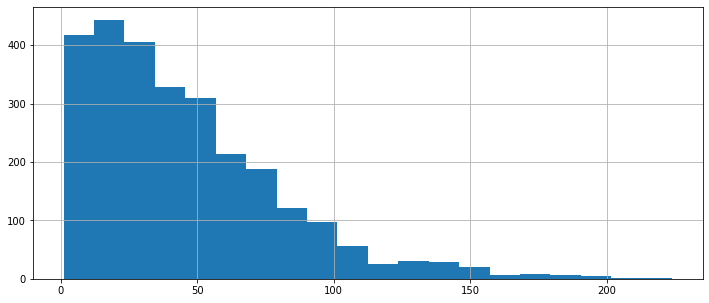

In [92]:
print('Минимальное число сообщений/ месяц:', df['messages_sum'].min())
print('Максимальное число сообщений/ месяц:', df['messages_sum'].max())
print('Пропусков:', len(df[df['messages_sum'].isna()]))
df['messages_sum'] .hist(bins = 20, figsize = (12,5))

In [93]:
display(df[df['messages_sum'].isna()].head()) 

,user_id,month,minutes_sum,messages_sum,age,churn_date,city,first_name,last_name,reg_date,tariff_name,gb_used,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,cost
8,1001,11,430,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,18.0,50,500,550,200,3,3,15.0,1150.0
9,1001,12,414,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,14.0,50,500,550,200,3,3,15.0,550.0
42,1006,2,42,NaN,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,2.0,50,500,550,200,3,3,15.0,550.0
43,1006,3,286,NaN,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,17.0,50,500,550,200,3,3,15.0,950.0
44,1006,4,356,NaN,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,14.0,50,500,550,200,3,3,15.0,550.0


In [94]:
df['messages_sum'] = df['messages_sum'].fillna(0)
df['messages_sum'] = df['messages_sum'].astype('int')

Экстремальные значения длительности звонков и числа сообщений не вызывают сомнений в достоверности.
Пропуски в числе сообщений заменим на 0, предположив, что пользователи не использовали эту функцию в конкретный месяц. 

Минимальный возраст абонента: 18
Максимальный возраст абонента: 75
Пропусков: 0


<AxesSubplot:>

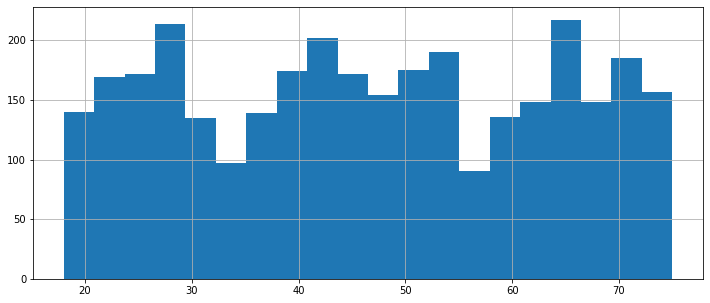

In [95]:
print('Минимальный возраст абонента:', df['age'].min())
print('Максимальный возраст абонента:', df['age'].max())
print('Пропусков:', len(df[df['age'].isna()]))
df['age'].hist(bins = 20, figsize = (12,5))

Экстремальные значения возраста пользователей не вызывают сомнений в достоверности.

In [96]:
df['churn_date'] = pd.DatetimeIndex(df['churn_date'])
df['reg_date'] = pd.DatetimeIndex(df['reg_date'])

Формат дат регистрации пользователя и окончания контракта с пользователем приведены в корректный вид. 

In [97]:
df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Все города находятся на территории РФ, города из зоны роуминга в датасет не попали. 

Заменим на 0 расход Гб интернет-трафика, предположив, что некоторые пользователи могли не использовать интернет в те или иные месяцы. Приведем результат к целочисленным значениям. 

<AxesSubplot:>

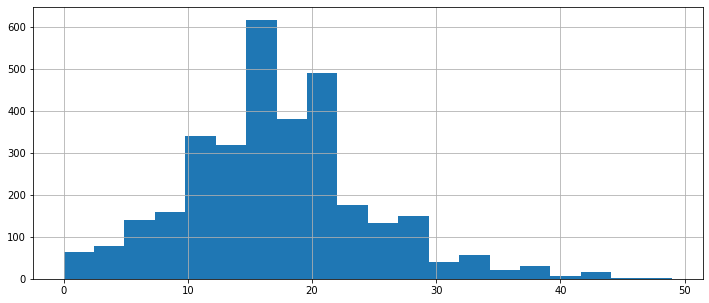

In [98]:
df['gb_used'] = df['gb_used'].fillna(0)
df['gb_used'] = df['gb_used'].astype('int')
df['gb_per_month_included'] = df['gb_per_month_included'].astype('int')
df['gb_used'].hist(bins = 20, figsize = (12,5))

Повторно изучим датасет, чтобы убедиться в аккуратности его оформления. 

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   minutes_sum            3214 non-null   int64         
 3   messages_sum           3214 non-null   int64         
 4   age                    3214 non-null   int64         
 5   churn_date             187 non-null    datetime64[ns]
 6   city                   3214 non-null   object        
 7   first_name             3214 non-null   object        
 8   last_name              3214 non-null   object        
 9   reg_date               3214 non-null   datetime64[ns]
 10  tariff_name            3214 non-null   object        
 11  gb_used                3214 non-null   int64         
 12  messages_included      3214 non-null   int64         
 13  min

## Анализ данных

In [123]:
# код ревьюера
df.pivot_table(index = 'tariff_name', values = ['minutes_sum', 'gb_used', 'messages_sum'],
                aggfunc = ['mean', 'std', 'var'])

mean                                std               \
               gb_used messages_sum minutes_sum   gb_used messages_sum   
tariff_name                                                              
smart        16.328847    33.384029  417.934948  5.747061    28.227876   
ultra        19.494416    49.363452  526.623350  9.853511    47.804457   

                               var                              
            minutes_sum    gb_used messages_sum    minutes_sum  
tariff_name                                                     
smart        190.313730  33.028705   796.812958   36219.315784  
ultra        317.606098  97.091686  2285.266143  100873.633397

### Длительность вызовов

Посчитаем средние длительности вызовов по месяцам по тарифам. 

In [102]:
duration_mean = df.pivot_table(index='month', columns='tariff_name',values='minutes_sum', aggfunc='mean')
duration_mean = duration_mean.reset_index()
display(duration_mean.head())

tariff_name,month,smart,ultra
0,1,203.852941,428.111111
1,2,298.689655,297.125000
2,3,390.051948,489.648649
3,4,367.133929,458.018182
4,5,387.361702,510.328358


Изучим распределение длительности вызовов по месяцам по тарифам.

Text(0, 0.5, 'Месяцы')

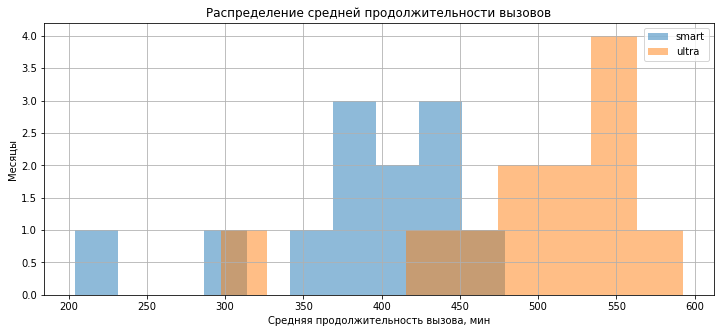

In [103]:
duration_mean['smart'].hist(bins=10, figsize = (12,5), legend=True, alpha = 0.5).set_title('Распределение средней продолжительности вызовов')
duration_mean['ultra'].hist(bins=10, figsize = (12,5), legend=True, alpha = 0.5)
pl.xlabel("Средняя продолжительность вызова, мин")
pl.ylabel("Месяцы")

**Вывод**: средняя продолжительность вызова в тарифе Ультра значительно выше, чем в тарифе Смарт. 

Рассмотрим распределение дисперсии длительности вызова по месяцу по тарифу.

tariff_name,month,smart,ultra
0,1,23787.341355,72769.361111
1,2,36412.287961,87919.679348
2,3,36823.155161,111384.900901
3,4,34778.207127,71653.870034
4,5,34820.061094,83870.193578


Text(0, 0.5, 'Месяцы')

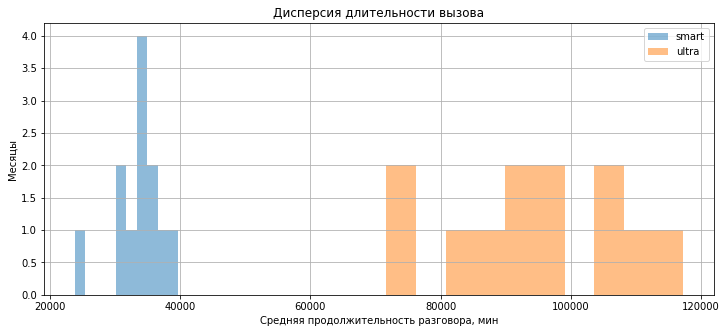

In [104]:
duration_var = df.pivot_table(index='month', columns='tariff_name',values='minutes_sum', aggfunc=np.var)
duration_var = duration_var.reset_index()
display(duration_var.head())
duration_var['smart'].hist(bins=10, figsize = (12,5), legend=True, alpha = 0.5).set_title('Дисперсия длительности вызова')
duration_var['ultra'].hist(bins=10, figsize = (12,5), legend=True, alpha = 0.5)
pl.xlabel("Средняя продолжительность разговора, мин")
pl.ylabel("Месяцы")

In [105]:
display(df.head())

,user_id,month,minutes_sum,messages_sum,age,churn_date,city,first_name,last_name,reg_date,tariff_name,gb_used,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,cost
0,1000,5,159,22,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3,1000,3000,1950,150,1,1,30,1950.0
1,1000,6,172,60,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23,1000,3000,1950,150,1,1,30,1950.0
2,1000,7,340,75,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1000,3000,1950,150,1,1,30,1950.0
3,1000,8,408,81,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14,1000,3000,1950,150,1,1,30,1950.0
4,1000,9,466,57,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15,1000,3000,1950,150,1,1,30,1950.0


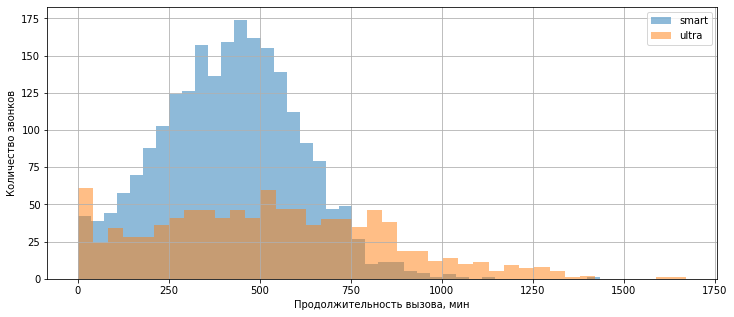

In [106]:
df[df['tariff_name'] == 'smart']['minutes_sum'].hist(bins=40, figsize = (12,5), alpha = 0.5)
df[df['tariff_name'] == 'ultra']['minutes_sum'].hist(bins=40, figsize = (12,5), alpha = 0.5)
pl.xlabel("Продолжительность вызова, мин")
pl.ylabel("Количество звонков")
plt.legend(['smart', 'ultra'])

**Вывод**: распределение дисперсии тарифа Смарт значительно уже по сравнению с распределением дисперсии тарифа Ультра. 
Из этого можно сделать вывод, что пользователи тарифа Смарт склонны иметь вызовы в более узком диапазоне длительности. 
Пользователи тарифа Ультра, наоборот, не отличаются единообразным (в этом смысле) поведением.
Количество суммы длительности звонков Смарт имеет ярко выраженный пик в районе 480 минут/ месяц. До этого значения количество суммы длительности звонков растут, после - снижаются и практически обнуляются ближе к сумм длительности звонков 1000 минут/ месяц.
Количество суммы длительности звонков Ультра не имеют ярко выраженных пиков, а максимальная сумма длительности звонков Ультра сильно выше, чем у Смарт. 

Рассмотрим распределение ст отклонения длительности вызова по месяцу по тарифу.

tariff_name,month,smart,ultra
0,1,154.231454,269.757968
1,2,190.820041,296.512528
2,3,191.893604,333.743765
3,4,186.489161,267.682405
4,5,186.601343,289.603511


Text(0, 0.5, 'Месяцы')

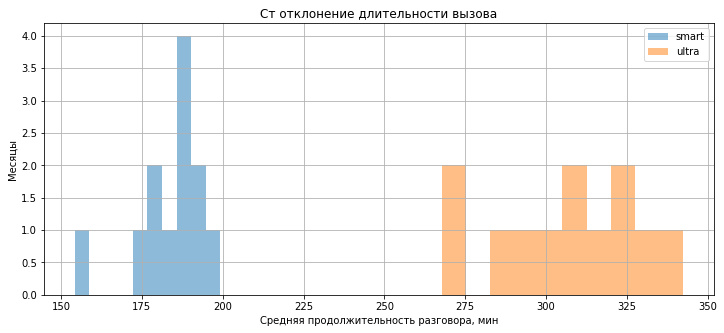

In [107]:
duration_std = df.pivot_table(index='month', columns='tariff_name',values='minutes_sum', aggfunc=np.std)
duration_std = duration_std.reset_index()
display(duration_std.head())
duration_std['smart'].hist(bins=10, figsize = (12,5), legend=True, alpha = 0.5).set_title('Ст отклонение длительности вызова')
duration_std['ultra'].hist(bins=10, figsize = (12,5), legend=True, alpha = 0.5)
pl.xlabel("Средняя продолжительность разговора, мин")
pl.ylabel("Месяцы")

**Вывод:** графически поведение ст отклонения не сильно отличается от поведения дисперсии, что логично, ведь ст отклонение является квадратным корнем дисперсии.

Text(0.5, 1.0, 'Средняя длительность вызова по месяцам')

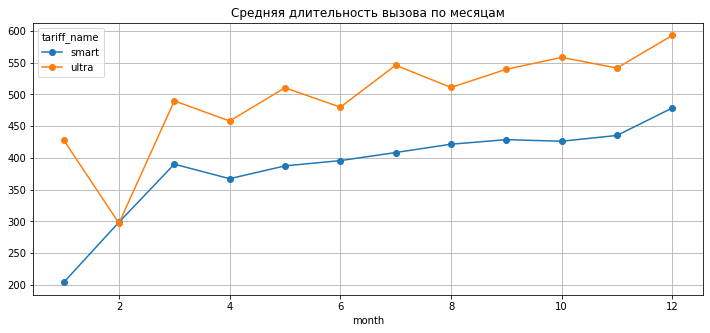

In [108]:
(
   df.pivot_table(index='month', columns='tariff_name', values = 'minutes_sum', aggfunc = 'mean')
    .plot(style = 'o-',grid = True, figsize = (12,5))
    .set_title('Средняя длительность вызова по месяцам')
)

**Вывод:** продолжительность вызовов в тарифе Ультра значительно выше, чем в тарифе Смарт (~100 минут/ месяц в среднем), однако в феврале длительность вызовов сравнялась. Это сочленение выглядит либо невыявленной ранее аномалией в данных, либо в феврале произошли масштабные события, которые заметно снизили длительность вызовов в тарифе Ультра по всей стране.  

### Число сообщений

По аналогии с пунктом выше посчитаем среднее число сообщений по месяцам по тарифам. 

In [109]:
messanges_mean = df.pivot_table(index='month', columns='tariff_name', values='messages_sum', aggfunc='mean')
messanges_mean = messanges_mean.reset_index()
display(messanges_mean.head())

tariff_name,month,smart,ultra
0,1,18.235294,33.777778
1,2,24.086207,21.958333
2,3,31.857143,32.297297
3,4,30.741071,31.563636
4,5,33.773050,37.850746


Text(0, 0.5, 'Месяцы')

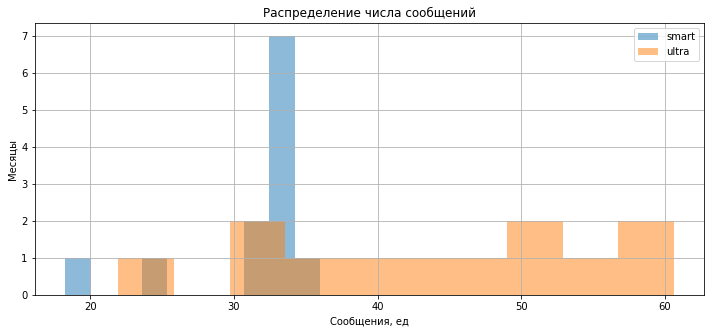

In [110]:
messanges_mean['smart'].hist(bins=10, figsize = (12,5), legend=True, alpha = 0.5).set_title('Распределение числа сообщений')
messanges_mean['ultra'].hist(bins=10, figsize = (12,5), legend=True, alpha = 0.5)
pl.xlabel("Сообщения, ед")
pl.ylabel("Месяцы")

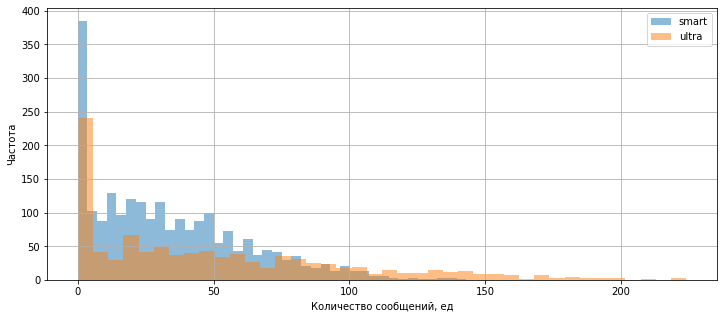

In [111]:
df[df['tariff_name'] == 'smart']['messages_sum'].hist(bins=40, figsize = (12,5), alpha = 0.5)
df[df['tariff_name'] == 'ultra']['messages_sum'].hist(bins=40, figsize = (12,5), alpha = 0.5)
pl.xlabel("Количество сообщений, ед")
pl.ylabel("Частота")
plt.legend(['smart', 'ultra'])

**Обратить внимание:** в целом, пользователи тарифа Смарт более полугода отправляли, в среднем, 33-35 сообщений в месяц. 
Эта информация может быть полезной для составления новых тарифных планов. 
Пользователи Смарт чаще пишут до 75 сообщений/ месяц. Более 75 сообщений/ месяц пишут пользователи Ультра.
Пользователи Смарт значительно чаще пользователей Ультра вообще не пользуются сообщениями. 

tariff_name,index,month,smart,ultra
0,0,1,23787.341355,72769.361111
1,1,2,36412.287961,87919.679348
2,2,3,36823.155161,111384.900901
3,3,4,34778.207127,71653.870034
4,4,5,34820.061094,83870.193578


Text(0, 0.5, 'Месяцы')

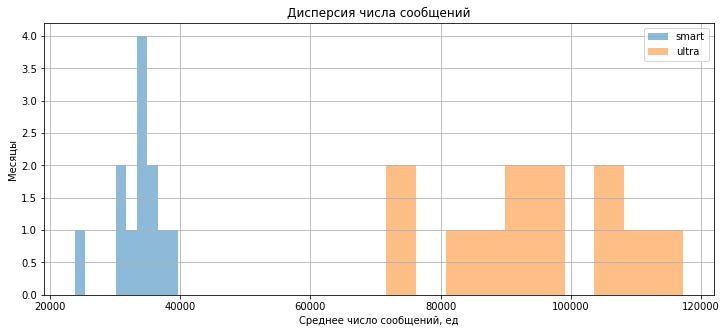

In [112]:
messages_var = df.pivot_table(index='month', columns='tariff_name',values='messages_sum', aggfunc=np.var)
messages_var = duration_var.reset_index()
display(messages_var.head())
messages_var['smart'].hist(bins=10, figsize = (12,5), legend=True, alpha = 0.5).set_title('Дисперсия числа сообщений')
messages_var['ultra'].hist(bins=10, figsize = (12,5), legend=True, alpha = 0.5)
pl.xlabel("Среднее число сообщений, ед")
pl.ylabel("Месяцы")

Аналогично с длительностью вызовов: пользователи Ультра более гибки в выборе, сколько сообщений в месяц им отправлять.
Анализ ст отклонения не проводим, тк получим близкие по содержанию выводы. 

Text(0.5, 1.0, 'Среднее число сообщений по месяцам')

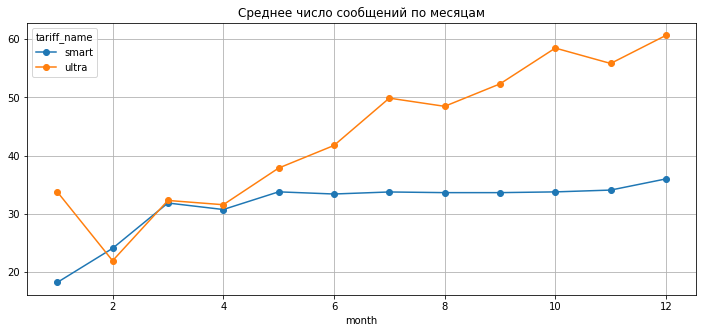

In [113]:
(
   df.pivot_table(index='month', columns='tariff_name', values = 'messages_sum', aggfunc = 'mean')
    .plot(style = 'o-',grid = True, figsize = (12,5))
    .set_title('Среднее число сообщений по месяцам')
)

**Вывод:** в целом, пользователи Ультра пишут больше сообщений, чем пользователи Смарт, причем от месяца к месяцу тренд усиливается. Тем не менее, в феврале произошел значительный спад, на который мы обратили внимание при анализе длительности вызовов. 

### Трафик Гб

In [114]:
gb_used_mean = df.pivot_table(index='month', columns='tariff_name',values='gb_used', aggfunc='mean')
gb_used_mean = gb_used_mean.reset_index()
display(gb_used_mean.head())

tariff_name,month,smart,ultra
0,1,8.735294,13.222222
1,2,11.844828,12.000000
2,3,15.233766,17.648649
3,4,13.625000,16.963636
4,5,15.907801,19.373134


Text(0, 0.5, 'Individuals')

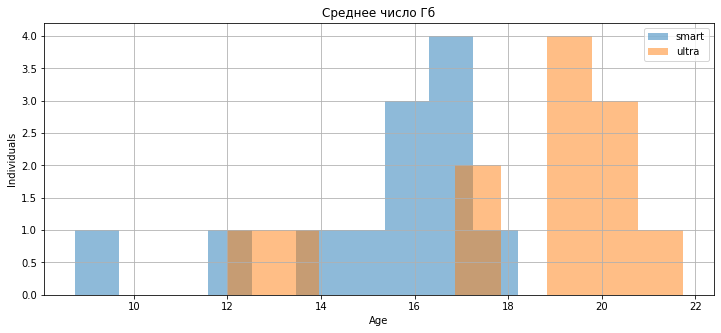

In [115]:
gb_used_mean['smart'].hist(bins=10, figsize = (12,5), legend=True, alpha = 0.5).set_title('Среднее число Гб')
gb_used_mean['ultra'].hist(bins=10, figsize = (12,5), legend=True, alpha = 0.5)
pl.xlabel("Age")
pl.ylabel("Individuals")

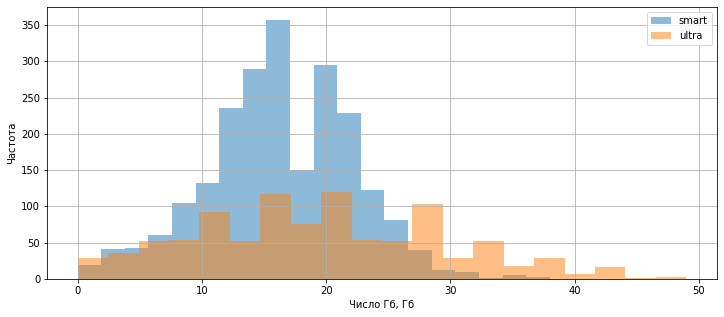

In [116]:
df[df['tariff_name'] == 'smart']['gb_used'].hist(bins=20, figsize = (12,5), alpha = 0.5)
df[df['tariff_name'] == 'ultra']['gb_used'].hist(bins=20, figsize = (12,5), alpha = 0.5)
pl.xlabel("Число Гб, Гб")
pl.ylabel("Частота")
plt.legend(['smart', 'ultra'])

**Вывод:** пользователи обоих тарифов проявляют близкий интерес к потреблению интернет-трафика. По этому критерию можно сделать осторожный вывод, что тарифом Смарт пользуется значительное число молодых людей, которые больше времени проводят в интернете. 
Пользователи Смарт значительно чаще потребляют до 26 Гб/ месяц, чем пользователи Ультра. 
Пользователи Ультра чаще пользователей Смарт потребляют 27 и более Гб/ месяц. 

tariff_name,month,smart,ultra
0,1,39.412656,44.444444
1,2,37.150938,109.130435
2,3,32.549897,114.345345
3,4,31.299550,89.443098
4,5,34.370010,95.631389


Text(0, 0.5, 'Месяцы')

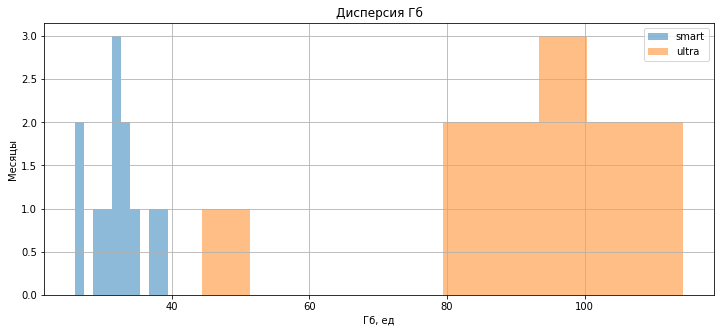

In [117]:
gb_var = df.pivot_table(index='month', columns='tariff_name',values='gb_used', aggfunc=np.var)
gb_var = gb_var.reset_index()
display(gb_var.head())
gb_var['smart'].hist(bins=10, figsize = (12,5), legend=True, alpha = 0.5).set_title('Дисперсия Гб')
gb_var['ultra'].hist(bins=10, figsize = (12,5), legend=True, alpha = 0.5)
pl.xlabel("Гб, ед")
pl.ylabel("Месяцы")

**Вывод:** пользователи Смарт потребляют относительно постоянное число Гб по месяцам (разброс дисперсии небольшой). Пользователи Ультра значительно, как видно по разбросу дисперсии, отличаются в потреблении Гб от месяца к месяцу. 

Text(0.5, 1.0, 'Потребление Гб по месяцам')

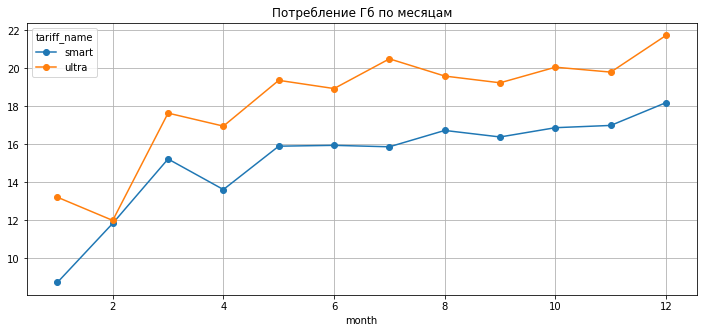

In [118]:
(
   df.pivot_table(index='month', columns='tariff_name', values = 'gb_used', aggfunc = 'mean')
    .plot(style = 'o-',grid = True, figsize = (12,5))
    .set_title('Потребление Гб по месяцам')
)

**Вывод:** в целом, пользователи Ультра потребляют больше интернет-трафика, чем пользователи Смарт. Тем не менее, в феврале произошел значительный спад, на который мы обратили внимание при анализе длительности вызовов и числа сообщений. 

## Проверка гипотезы

Изучим средние по тарифам. 

In [119]:
smart_mean = df.query('tariff_name == "smart"')['cost'].mean()
print('Тариф Смарт. Средняя выручка (руб):', smart_mean)
ultra_mean = df.query('tariff_name == "ultra"')['cost'].mean()
print('Тариф Ультра. Средняя выручка (руб):', ultra_mean)

Тариф Смарт. Средняя выручка (руб): 1289.9735307312696
Тариф Ультра. Средняя выручка (руб): 2070.1522842639592


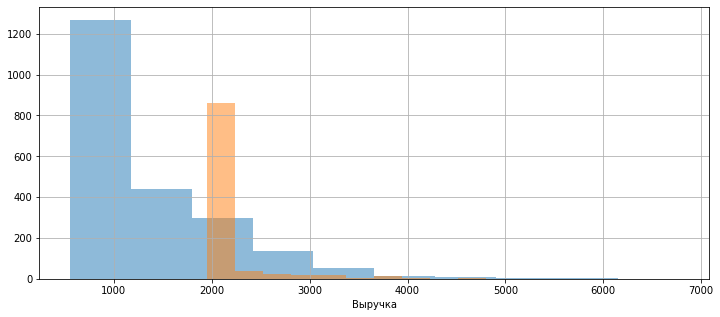

In [120]:
plt.figure(figsize = (12,5))
plt.xlabel('Выручка')
df.query('tariff_name == "smart"')['cost'].hist(bins=10, alpha = 0.5)
df.query('tariff_name == "ultra"')['cost'].hist(bins=10, alpha = 0.5)
plt.show()

Среднее по тарифу *Смарт* ближе к 1000р, а это означает, что пользователи Смарт нередко исчерпывают свой пакет за 550 руб/ месяц и потребляют дополнительные минуты, сообщения и Гб.
Среднее по тарифу *Смарт* ближе к 2000р, и это отражает тот факт, что пользователи Ультра обычно укладываются в стоимость, зашитую в тарифе, превышение происходит редко.

**Гипотеза 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**
H0 (нулевая гипотеза) - средняя выручка пользователей тарифов «Ультра» и «Смарт» не отличаются
H1 (альтернативная гипотеза) - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [121]:
alpha = .05 

results = st.ttest_ind(
    df.query('tariff_name == "smart"')['cost'], 
    df.query('tariff_name == "ultra"')['cost']
)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


**Вывод:** гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не отличаются, неверна. 

**Гипотеза 2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**
H0 (нулевая гипотеза) - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
H1 (альтернативная гипотеза) - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [122]:
alpha = .05 

results = st.ttest_ind(
    df.query('city == "Москва"')['cost'], 
    df.query('city != "Москва"')['cost']
)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


**Вывод:** гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, неверна. 

В обоих случаях для проверки использовали метод scipy.stats.ttest_ind (array1, array2, equal_var).
Он целенаправленно создан для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.
Гипотезы сформулированы исходя из логики: если требуется проверить тезис, значит базовая гипотеза говорит об обратном тезисе.
В обоих случаях используем критерий p-value, который показывает вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна.

## Общий вывод

**Длительность вызовов, потребление Гб трафика, число сообщений**
Средняя продолжительность вызова, число сообщений и потребление Гб в тарифе Ультра значительно выше, чем в тарифе Смарт.
Данные за февраль содержат критическую аномалию, повлиявшую на результат, или в феврале произошли события, полностью сблизившие длительность вызовов, число сообщений и потребление Гб. Полагаю, это как-то связано со взаимодействием тарифов между собой: возможно, Смарт оттянул пользователей Ультра.
Пользователи Ультра в значительной степени менее предсказуемые в прогнозе длительности вызовов/ числа сообщений/ объема потребляемых Гб трафика.

**Превышение/ непревышение лимита по тарифному плану**
Среднее по тарифу *Смарт* ближе к 1000р, а это означает, что пользователи Смарт нередко исчерпывают свой пакет за 550 руб/ месяц и потребляют дополнительные минуты, сообщения и Гб.
Среднее по тарифу *Смарт* ближе к 2000р, и это отражает тот факт, что пользователи Ультра обычно укладываются в стоимость, зашитую в тарифе, превышение происходит редко.

**Проверка гипотез**
Гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не отличаются, неверна. 
Гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, неверна.

**Профитность тарифов**
Если исходить из того, что затраты на поддержку тарифов идентичны, а также на основе того, что выручка у Тарифа Ультра выше, рекомендовано считать тариф Ультра более прибыльным. 